# Post-Processing Statistical Models in Chapter 7

This notebook processes the brms/stan output and creates the figures used in this chapter. Generally, everything is pretty similar to the previous results. However, the estimation did change a little bit. The quadratic specification made some of my code break. I ended up changing things to a multilevel model. Throughout the analysis:

* I estimated a latent variable of authoritarianism. It doesn't matter, but for consistency with Stanley's latent variable analysis, it seemed wise.
* Multinomial logit models.

In [1]:
### Load dependencies, data, themes, configurations
rm(list = ls())
#require(c("tidyverse", "tidybayes", "broom", "lavaan", "cowplot", "readstata13", "foreign", "car", "modelr"))
### useful functinon to 0-1 recode
zero.one<-function(x){
  min.x<-min(x, na.rm=T)
  max.x<-max(x-min.x, na.rm=T)
  return((x-min.x)/max.x)
}

library(brms)
library(ggplot2)
library(modelr)
library(tidybayes)
library(dplyr)
library(cowplot)
library(haven)
library(forcats)
## Some helper functions, and configurations.
load("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/clean_data/panel.auth.rda")  ### Just work from this data; everything should be here, recoded.
## models
load("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/Chapters/Chapters/Chapter7/chapter7.rda")
dat2000 = tmp_data[[4]]
dat2012 = tmp_data[[5]]
dat2016 = tmp_data[[6]]

####
dim(dat2000)
dim(dat2012)
dim(dat2016)

Loading required package: Rcpp

Loading 'brms' package (version 2.16.3). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: 'brms'


The following object is masked from 'package:stats':

    ar



Attaching package: 'tidybayes'


The following objects are masked from 'package:brms':

    dstudent_t, pstudent_t, qstudent_t, rstudent_t



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 449  15

[1] 3860   15

[1] 1277   15

In [24]:
## Voting transitions
table(dat2000$vote1, dat2000$vote2) %>% prop.table(1)
table(dat2012$vote1, dat2012$vote2) %>% prop.table(1)
table(dat2016$vote1, dat2016$vote2) %>% prop.table(1)


## Voting transitions
table(dat2000$pid3.1, dat2000$pid3.2) %>% prop.table(1)
table(dat2012$pid3.1, dat2012$pid3.2) %>% prop.table(1)
table(dat2016$pid3.1, dat2016$pid3.2) %>% prop.table(1)



   
             0          1
  0 0.86448598 0.13551402
  1 0.05531915 0.94468085

   
             0          1
  0 0.91627172 0.08372828
  1 0.04742478 0.95257522

   
             0          1
  0 0.95695364 0.04304636
  1 0.06983655 0.93016345

   
             1          2          3
  1 0.92086331 0.05755396 0.02158273
  2 0.17218543 0.59602649 0.23178808
  3 0.01257862 0.16981132 0.81761006

   
              1           2           3
  1 0.895988113 0.069836553 0.034175334
  2 0.129235619 0.752561072 0.118203310
  3 0.008835341 0.117269076 0.873895582

   
             1          2          3
  1 0.84827586 0.10574713 0.04597701
  2 0.14322917 0.58072917 0.27604167
  3 0.03930131 0.11572052 0.84497817

In our statistical model, our model generates a transition probability of 0.24 that....

Authoritarians are clearly defecting from Democratic ranks, as are Independents. Note that almost all the movement is in the righmost cell. Here are the transitions.

# Party Identification and Voting
## 2000-2004

In [2]:

ggtheme = theme(
        plot.title=element_text(face="bold",hjust=0,vjust=0,colour="#3C3C3C",size=20),
        axis.text.x=element_text(size=16,colour="#535353",face="bold"),
        axis.text.y=element_text(size=16,colour="#535353",face="bold"),
        axis.title = element_text(size=16,colour="#535353",face="bold"),
        axis.title.y=element_text(size=16,colour="#535353",face="bold",vjust=1.5),
        axis.ticks=element_blank(),
        strip.text.x = element_text(size = 16),
        panel.grid.major=element_line(colour="#D0D0D0",size=.25),
        panel.background=element_rect(fill="white"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16)) 

create_party_list = function(new_dat, model){
 out1                                       = new_dat %>% mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                              add_epred_draws(model) %>% 
                                              pivot_wider(values_from = .epred, names_from = .category) %>% 
                                              filter(republican ==1 & independent ==0 & authoritarianism ==1)  
 out2                                         = new_dat %>% 
                                                mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                                add_epred_draws(model) %>% 
                                                pivot_wider(values_from = .epred, names_from = .category) %>% 
                                                filter(republican ==1 & independent ==0 & authoritarianism ==0)  
republican_2000 = out1[,c("1", "2", "3")] - out2[,c("1", "2", "3")]

 out1                                       = new_dat %>% mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                              add_epred_draws(model) %>% 
                                              pivot_wider(values_from = .epred, names_from = .category) %>% 
                                              filter(republican ==0 & independent ==1 & authoritarianism ==1)  
 out2                                         = new_dat %>% 
                                                mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                                add_epred_draws(model) %>% 
                                                pivot_wider(values_from = .epred, names_from = .category) %>% 
                                                filter(republican ==0 & independent ==1 & authoritarianism ==0)  

independent_2000 = out1[,c("1", "2", "3")] - out2[,c("1", "2", "3")]



 out1                                       = new_dat %>% mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                              add_epred_draws(model) %>% 
                                              pivot_wider(values_from = .epred, names_from = .category) %>% 
                                              filter(republican ==0 & independent ==0 & authoritarianism ==1)  
 out2                                         = new_dat %>% 
                                                mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                                add_epred_draws(model) %>% 
                                                pivot_wider(values_from = .epred, names_from = .category) %>% 
                                                filter(republican ==0 & independent ==0 & authoritarianism ==0)  

democrat_2000 = out1[,c("1", "2", "3")] - out2[,c("1", "2", "3")]
return(list(republican_2000, independent_2000, democrat_2000))
}

In [3]:
### Create the function for voting ####
create_vote_list = function(new_dat, model){
 out1                                       = new_dat %>% mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                                add_linpred_draws(model) %>% 
                                                mutate(Vote_Republican = plogis(.linpred))   %>%
                                              filter(vote1 ==1 & authoritarianism ==1)  
 out2                                         = new_dat %>% 
                                                mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                                add_linpred_draws(model) %>% 
                                                mutate(Vote_Republican = plogis(.linpred)) %>%
                                                filter(vote1 ==1, authoritarianism ==0)  


republican_2000 = out1[,c("Vote_Republican")] - out2[,c("Vote_Republican")]

 
 out1                                       = new_dat %>% mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                                add_linpred_draws(model) %>% 
                                                mutate(Vote_Republican = plogis(.linpred))   %>%
                                              filter(vote1 ==0 & authoritarianism ==1)  
 out2                                         = new_dat %>% 
                                                mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>% 
                                                add_linpred_draws(model) %>% 
                                                mutate(Vote_Republican = plogis(.linpred)) %>%
                                                filter(vote1 ==0, authoritarianism ==0)  


democrat_2000 = out1[,c("Vote_Republican")] - out2[,c("Vote_Republican")]

 
return(list(republican_2000, democrat_2000))
}

Below I present the results for 2000-2004.

Warning message:
"Duplicated aesthetics after name standardisation: quantiles"
Picking joint bandwidth of 0.00961

Picking joint bandwidth of 0.0112

Picking joint bandwidth of 0.0129



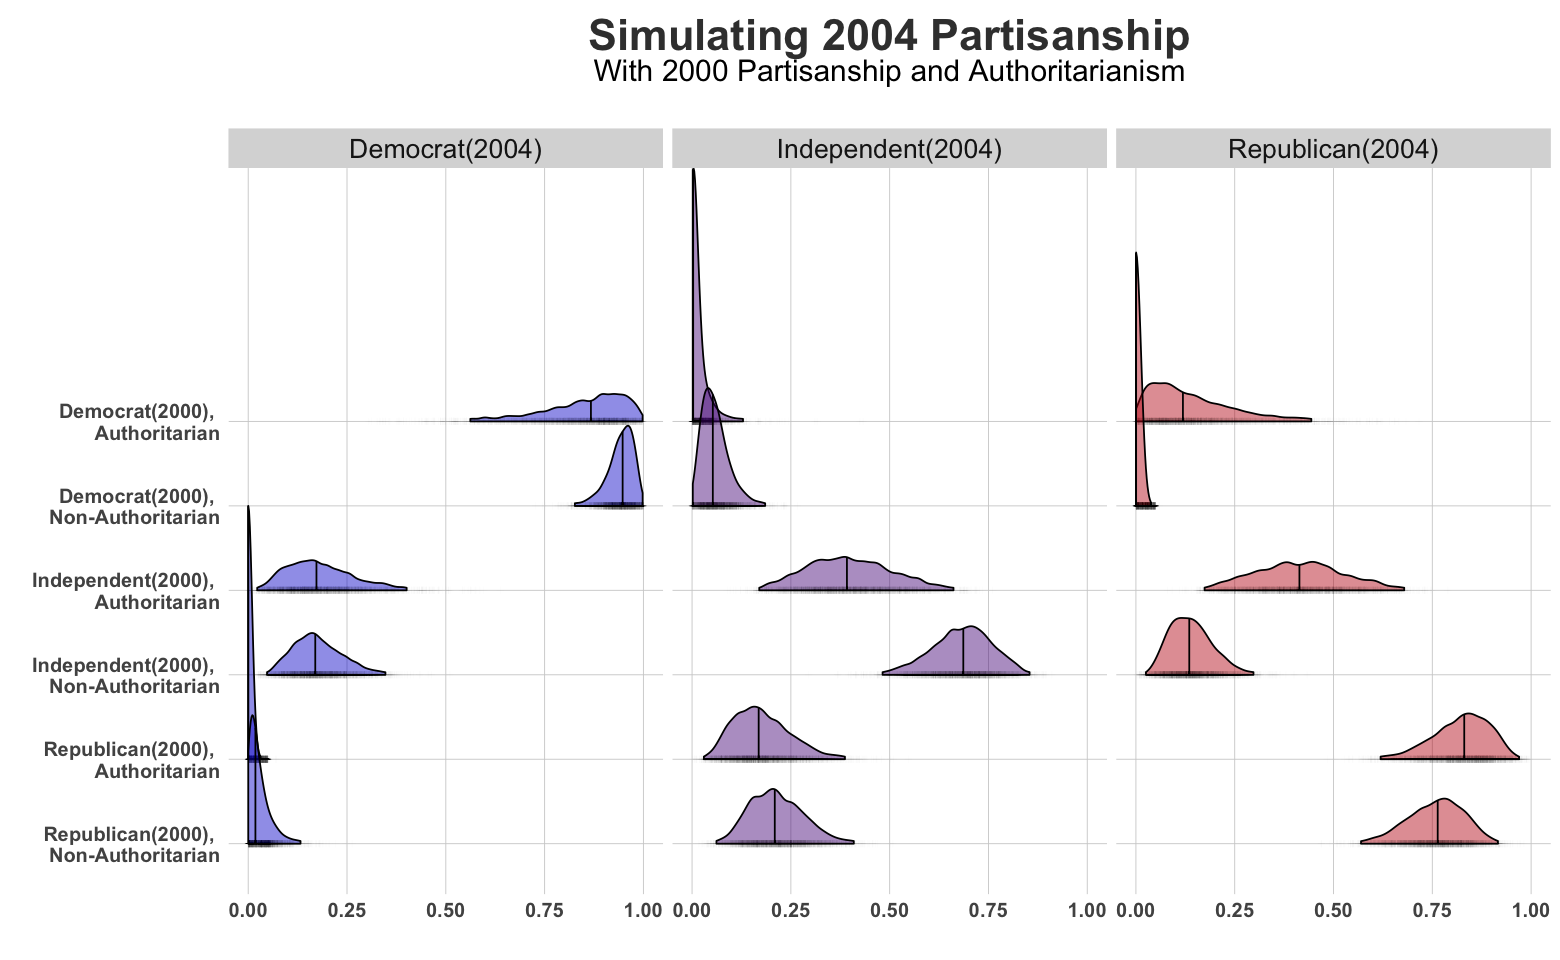

In [5]:

library(haven)
output = zap_labels(dat2000) %>% data_grid(sex.2000 = mean(sex.2000), age.2000 = mean(age.2000), 
                       college.2000= mean(college.2000), income.2000 = mean(income.2000), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[2]]) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Independent", `2` = "Independent", `3` = "Republican")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0 & authoritarianism == 1, paste("Democrat(2000),", "\nAuthoritarian"),
                                                   ifelse(republican == 0 & independent ==1 & authoritarianism == 1, paste("Independent(2000),", "\nAuthoritarian"),
                                                             ifelse(republican == 1 & independent ==0 & authoritarianism == 1, paste("Republican(2000),", "\nAuthoritarian"),
                                                                  ifelse(republican == 0 & independent ==0 & authoritarianism == 0, paste("Democrat(2000),", "\nNon-Authoritarian"),
                                                                      ifelse(republican == 0 & independent ==1 & authoritarianism == 0, paste("Independent(2000),", "\nNon-Authoritarian"),
                                                                            ifelse(republican == 1 & independent ==0 & authoritarianism == 0, paste("Republican(2000),", "\nNon-Authoritarian"),
                                                    "ILL"))))))) %>% filter(Partisanship != "ILL") %>%
                   mutate(Partisanship2 = ifelse(republican == 0 & independent ==0, "Democrat(2004)", 
                                                ifelse(republican ==1 & independent ==0, "Republican(2004)",
                                                    "Independent(2016)"))) %>% 
                  mutate(Partisanship =   factor(Partisanship, levels=c(paste("Democrat(2000),", "\nAuthoritarian"), 
                                                                       paste("Democrat(2000),", "\nNon-Authoritarian"),
                                                                        paste("Independent(2000),", "\nAuthoritarian"),
                                                                        paste("Independent(2000),", "\nNon-Authoritarian"),
                                                                        paste("Republican(2000),", "\nAuthoritarian"),
                                                                        paste("Republican(2000),", "\nNon-Authoritarian")))) %>% 
                    mutate(Partisanship = fct_rev(Partisanship)) %>%  
                    mutate(PID_T2 = recode(.category, `1` = "Democrat(2004)", `2` = "Independent(2004)", `3` = "Republican(2004)") ) 
                    
                                                                    
options(repr.plot.width=13, repr.plot.height=8)
#0.5 - abs(0.5 - stat(ecdf)))
library(ggridges)      
plot = ggplot(data = output, aes(y = as.factor(Partisanship), 
                          x = .epred, 
                          fill = as.factor(PID_T2)))  +
            geom_density_ridges2(alpha = 0.45, scale = 3, show.legend = FALSE , 
                                  quantile_lines = TRUE, quantiles = 0.5, rel_min_height = 0.01,
                                   quantiles = 0.5,  calc_ecdf = FALSE,
                                    jittered_points = TRUE, position = position_points_jitter(width = 0.05, height = 0),
                                     point_shape = 3, point_size = 1, point_color = "black", point_alpha = 0.01  ) +
                                    facet_wrap(~as.factor(PID_T2)) +
            scale_fill_manual(values =c("#0927d1ea", "#530086", "#c01111")) +
            labs (title = "Simulating 2004 Partisanship", 
                          subtitle = "With 2000 Partisanship and Authoritarianism\n") + 
            scale_x_continuous("", limits=c(0,1))+
            scale_y_discrete("") + 
            ggtheme + 
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )
            
             
 plot

In [16]:
partisan_t1 = 
output = zap_labels(dat2000) %>% data_grid(sex.2000 = mean(sex.2000), age.2000 = mean(age.2000), 
                       college.2000= mean(college.2000), income.2000 = mean(income.2000), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[2]]) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Independent", `2` = "Independent", `3` = "Republican")) %>%
                       mutate(Partisanship = 
                        mutate(Partisanship2 = ifelse(republican == 0 & independent ==0, "Democrat(2004)", 
                                                ifelse(republican ==1 & independent ==0, "Republican(2004)",
                                                    "Independent(2016)"))) %>% 
                  mutate(Partisanship =   factor(Partisanship, levels=c(paste("Democrat(2000),", "\nAuthoritarian"), 
                                                                       paste("Democrat(2000),", "\nNon-Authoritarian"),
                                                                        paste("Independent(2000),", "\nAuthoritarian"),
                                                                        paste("Independent(2000),", "\nNon-Authoritarian"),
                                                                        paste("Republican(2000),", "\nAuthoritarian"),
                                                                        paste("Republican(2000),", "\nNon-Authoritarian")))) %>% 
                    mutate(Partisanship = fct_rev(Partisanship)) %>%  
                    mutate(PID_T2 = recode(.category, `1` = "Democrat(2004)", `2` = "Independent(2004)", `3` = "Republican(2004)") ) 
                    
grid = expand.grid(x = c(1, 2, 3), y = c(1, 2, 3)) %>% 
mutate(lag_pid = partisanship) %>% 
mutate(pid     = partisanship_2)

ERROR: [1m[33mError[39m in [1m[1m`mutate()`:[22m
[1m[22m[33m![39m Problem while computing `lag_pid = partisanship`.
[1mCaused by error:[22m
[33m![39m object 'partisanship' not found


In [11]:
output %>% group_by(Authoritarianism, PID_T2, Partisanship) %>% summarize(Mean = mean(.epred), 
                                                                          Min = quantile(.epred, prob = 0.975),
                                                                          Max = quantile(.epred, prob = 0.025))

`summarise()` has grouped output by 'Authoritarianism', 'PID_T2'. You can
override using the `.groups` argument.


Authoritarianism,PID_T2,Partisanship,Mean,Min,Max
<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
Authoritarian,Democrat(2004),"Republican(2000), Authoritarian",3.835669e-04,2.320490e-03,1.436159e-29
Authoritarian,Democrat(2004),"Independent(2000), Authoritarian",1.862610e-01,3.961389e-01,5.020069e-02
Authoritarian,Democrat(2004),"Democrat(2000), Authoritarian",8.374247e-01,9.854385e-01,5.244432e-01
Authoritarian,Independent(2004),"Republican(2000), Authoritarian",1.780121e-01,3.499584e-01,6.250533e-02
Authoritarian,Independent(2004),"Independent(2000), Authoritarian",3.986831e-01,6.244306e-01,2.015511e-01
Authoritarian,Independent(2004),"Democrat(2000), Authoritarian",1.305568e-02,8.858649e-02,3.280569e-06
Authoritarian,Republican(2004),"Republican(2000), Authoritarian",8.216044e-01,9.374172e-01,6.500416e-01
Authoritarian,Republican(2004),"Independent(2000), Authoritarian",4.150559e-01,6.412353e-01,2.074603e-01
Authoritarian,Republican(2004),"Democrat(2000), Authoritarian",1.495196e-01,4.630079e-01,1.074530e-02


In [85]:
 zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000), age.2000 = mean(age.2000), 
                       college.2000 = mean(college.2000), income.2000 = mean(income.2000), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[1]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Bush(2000),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Gore(2000),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Bush(2000),", "\nNon-Authoritarian"), 
                                                        paste("Gore(2000),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Gore(2000),", "\nAuthoritarian"),
                                        paste("Bush(2000),", "\nNon-Authoritarian"), 
                                        paste("Gore(2000),", "\nNon-Authoritarian"), 
                                        paste("Bush(2000),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter)) %>% group_by(Voter, Authoritarianism) %>% 
                        summarize(repvote = mean(Vote_Republican))

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


Voter,Authoritarianism,repvote
<fct>,<chr>,<dbl>
"Bush(2000), Authoritarian",Authoritarianism,0.93874760
"Gore(2000), Non-Authoritarian",Non-Authoritarians,0.02154062
"Bush(2000), Non-Authoritarian",Non-Authoritarians,0.90158010
"Gore(2000), Authoritarian",Authoritarianism,0.24826927


`summarise()` has grouped output by 'Authoritarianism'. You can override using
the `.groups` argument.


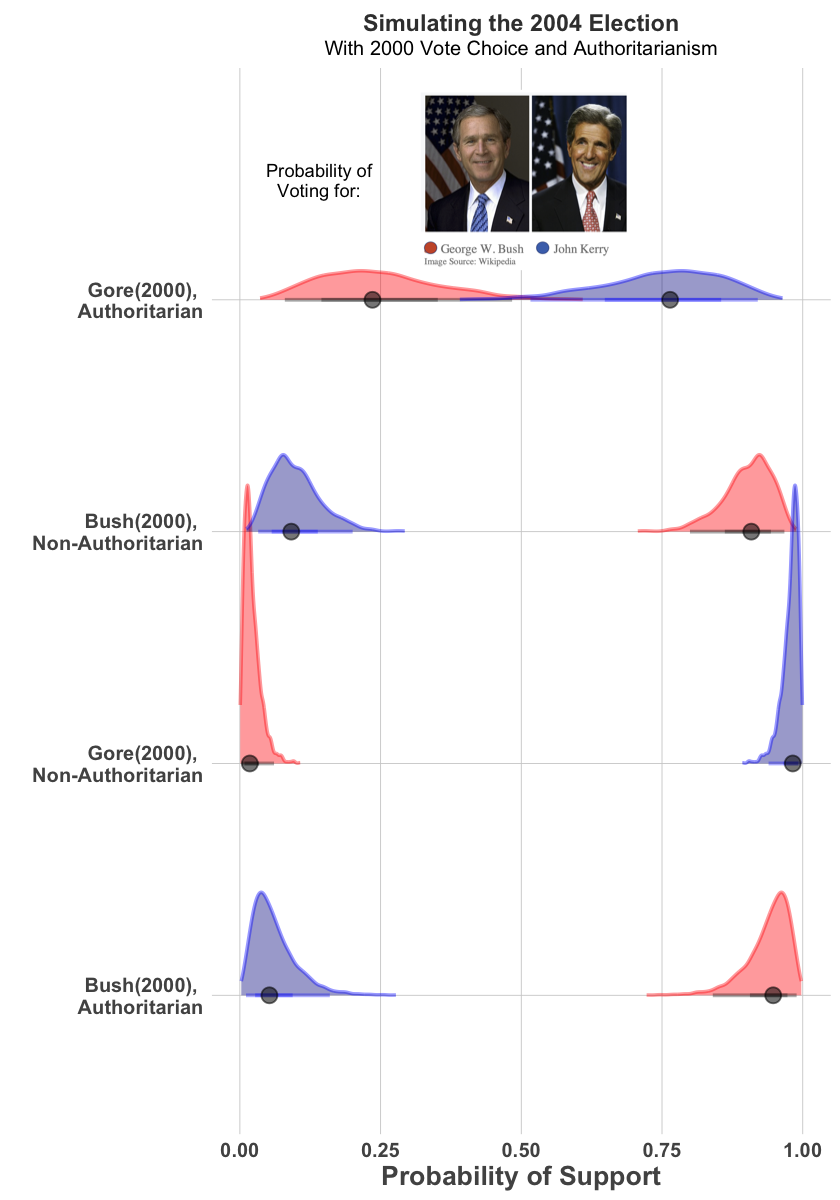

In [86]:
# library(haven)
options(repr.plot.width=7, repr.plot.height=10)


plot = zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000), age.2000 = mean(age.2000), 
                       college.2000 = mean(college.2000), income.2000 = mean(income.2000), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[1]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Bush(2000),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Gore(2000),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Bush(2000),", "\nNon-Authoritarian"), 
                                                        paste("Gore(2000),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Gore(2000),", "\nAuthoritarian"),
                                        paste("Bush(2000),", "\nNon-Authoritarian"), 
                                        paste("Gore(2000),", "\nNon-Authoritarian"), 
                                        paste("Bush(2000),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter))
                        
# Add verticla refs
refs  = plot %>% group_by(Authoritarianism, Voter) %>% summarize(Mean = mean(Vote_Republican)) %>% as.vector()

base_plot =  ggplot(plot) +
                    stat_slabinterval(aes(y = Vote_Republican, x = Voter), 
                                            slab_color = "red", scale = 1.2, interval_size = 4, 
                                            point_size =4 , interval_color = "black",
                                             side = "top", alpha = 0.32,  
                                          point_color = "black",  
                                            slab_fill = "red", slab_alpha =.4) +
                    stat_slabinterval( aes(y = Vote_Democrat, x = Voter), 
                                            point_color = "black", point_size = 4,
                                            slab_color = "blue", scale =1.2, alpha = 0.32,
                                            interval_size = 4, interval_color = "blue",
                                           side = "top", slab_alpha = 0.4, 
                                            slab_fill = "darkblue") +
                    #geom_hline(yintercept = refs$Mean, type = "dashed") + 
                    labs (title = "Simulating the 2004 Election", subtitle = "With 2000 Vote Choice and Authoritarianism") + 
                    scale_y_continuous("Probability of Support", limits=c(0,1))+
                    scale_x_discrete("") + 
                    coord_flip() +
                    ggtheme + scale_fill_manual(aes(fill = Voter_Type, group = Voter_Type),
                    name="Predicted 2004\nPresidential Vote", values=c("blue", "red"),  position = "top") +
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 14, hjust = 0.5),
                    plot.subtitle = element_text(size = 12, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )


#base_plot +  geom_vline(x = c(refs$Mean) ) 
    
# # # # Example with PNG (for fun, the OP's avatar - I love the raccoon)
  ggdraw() +
    draw_plot(base_plot)+
    draw_image("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/figs/pres/bushkerry.png",
                x = 0.5, y = 0.75, width =0.25, height =0.2) +
   draw_label("Probability of\nVoting for:", color = "black", x = 0.38, y=0.85, size = 11)                                        
                                                        
          

In [87]:
## Functions
library(tidyr)
new_dat = zap_labels(dat2000) %>% data_grid(sex.2000 = mean(sex.2000), age.2000 = mean(age.2000), 
                       college.2000= mean(college.2000), income.2000 = mean(income.2000), 
                       authoritarianism = c(0,1),
                       vote1 = c(0,1)) 
model  = dat[[1]]
vote_2000 = create_vote_list(new_dat, model)


## Functions
new_dat = zap_labels(dat2000) %>% data_grid(sex.2000 = mean(sex.2000), age.2000 = mean(age.2000), 
                       college.2000= mean(college.2000), income.2000 = mean(income.2000), 
                       authoritarianism = c(0,1),
                       republican = c(0,1),
                       independent = c(0,1)) 
model  = dat[[2]]
party_2000 = create_party_list(new_dat, model)


Using Party_2000 as id variables

`summarise()` has grouped output by 'Party_2000'. You can override using the
`.groups` argument.


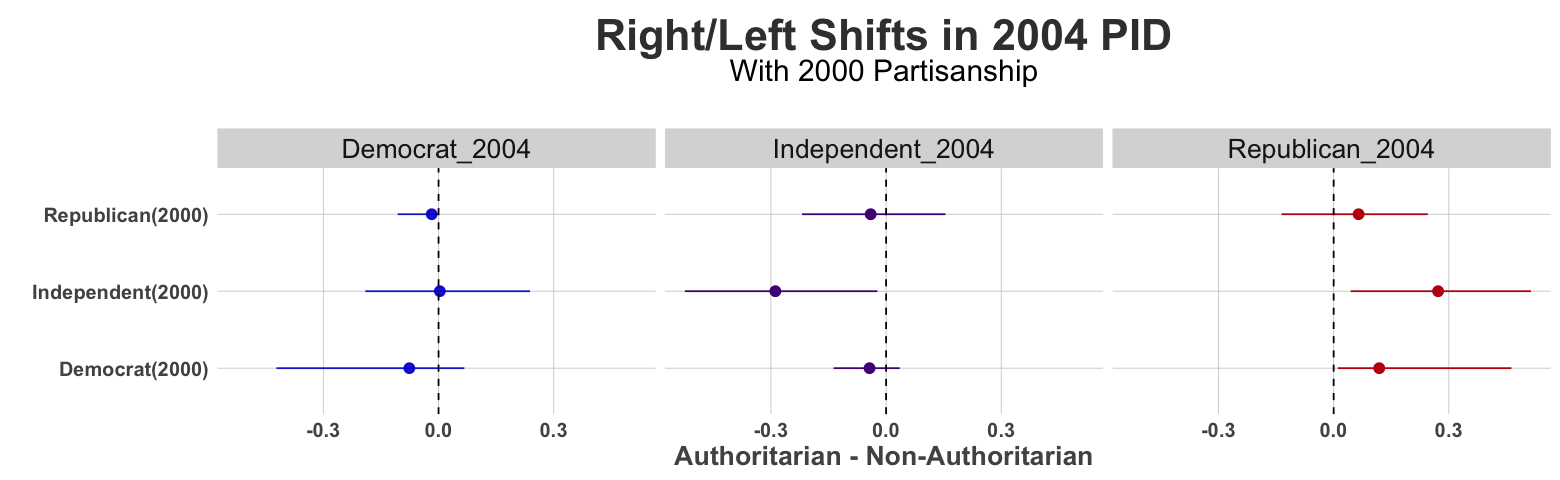

In [88]:
### Customize this for every plot

options(repr.plot.width=13, repr.plot.height=4)



plot_dat = data.frame(rbind(party_2000[[1]], party_2000[[2]], party_2000[[3]]),
           Partisanship_2000 = rep(c("Republican(2000)", "Independent(2000)", "Democrat(2000)"), each = 3000))
names(plot_dat) = c("Democrat_2004", "Independent_2004", "Republican_2004", "Party_2000")

reshape2::melt(plot_dat) %>% group_by(Party_2000, variable) %>% summarize(mean = quantile(value, 0.5), min = quantile(value, 0.025), max = quantile(value, 0.975)) %>% 
ggplot(aes(y = mean, ymax = max, ymin = min, 
                          x = Party_2000, 
                          color = as.factor(variable)))  + facet_wrap(~variable) +
           geom_pointrange() +
            scale_color_manual(values =c("#0927d1ea", "#530086", "#c01111")) +
            labs (title = "Right/Left Shifts in 2004 PID", 
                          subtitle = "With 2000 Partisanship\n") + 
            scale_x_discrete("") + scale_y_continuous("Authoritarian - Non-Authoritarian") + coord_flip() +
            geom_hline(yintercept = 0, linetype = "dashed", colour = "black") + 
            ggtheme + 
                # overrides
                    theme(legend.position="none",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )

In [89]:

plot_dat = data.frame(rbind(party_2000[[1]], party_2000[[2]], party_2000[[3]]),
           Partisanship_2000 = rep(c("Republican(2000)", "Independent(2000)", "Democrat(2000)"), each = 3000))
names(plot_dat) = c("Democrat_2004", "Independent_2004", "Republican_2004", "Party_2000")

reshape2::melt(plot_dat) %>% group_by(Party_2000, variable) %>% summarize(mean = quantile(value, 0.5), min = quantile(value, 0.025), max = quantile(value, 0.975))

Using Party_2000 as id variables

`summarise()` has grouped output by 'Party_2000'. You can override using the
`.groups` argument.


Party_2000,variable,mean,min,max
<chr>,<fct>,<dbl>,<dbl>,<dbl>
Democrat(2000),Democrat_2004,-0.076052489,-0.42241017,0.0672415229
Democrat(2000),Independent_2004,-0.043148632,-0.13689779,0.0355225981
Democrat(2000),Republican_2004,0.118673575,0.01074530,0.4630079433
Independent(2000),Democrat_2004,0.003348738,-0.19065434,0.2382118043
Independent(2000),Independent_2004,-0.288379414,-0.52423714,-0.0228361157
Independent(2000),Republican_2004,0.271973438,0.04419818,0.5138009679
Republican(2000),Democrat_2004,-0.017815088,-0.10641378,-0.0004462108
Republican(2000),Independent_2004,-0.040129324,-0.21884659,0.1547305886
Republican(2000),Republican_2004,0.064924812,-0.13578766,0.2451613792


Using Vote_2000 as id variables

`summarise()` has grouped output by 'Vote_2000'. You can override using the
`.groups` argument.


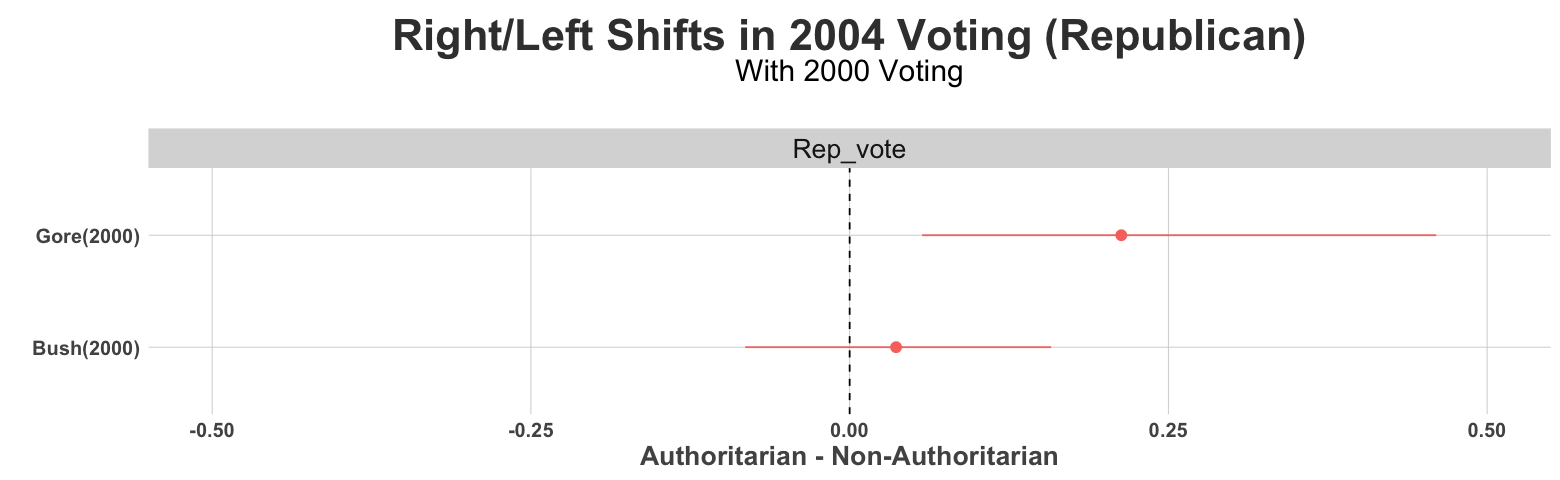

In [90]:


plot_dat = data.frame(rbind(vote_2000[[1]], vote_2000[[2]]),
           Vote_2000 = rep(c("Bush(2000)", "Gore(2000)"), each = 1500))
names(plot_dat) = c("Rep_vote", "Vote_2000")

reshape2::melt(plot_dat) %>% group_by(Vote_2000, variable) %>% summarize(mean = quantile(value, 0.5), min = quantile(value, 0.025), max = quantile(value, 0.975)) %>% 
ggplot(aes(y = mean, ymax = max, ymin = min, 
                          x = Vote_2000, 
                          color = "red"))  + facet_wrap(~variable) +
           geom_pointrange() +
            labs (title = "Right/Left Shifts in 2004 Voting (Republican)", 
                          subtitle = "With 2000 Voting\n") + 
            scale_x_discrete("") + scale_y_continuous("Authoritarian - Non-Authoritarian", lim = c(-0.5,0.5)) + coord_flip() +
            geom_hline(yintercept = 0, linetype = "dashed", colour = "black") + 
            ggtheme + 
                # overrides
                    theme(legend.position="none",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )

## 2012-2016

Picking joint bandwidth of 0.0036

Picking joint bandwidth of 0.00468

Picking joint bandwidth of 0.00385



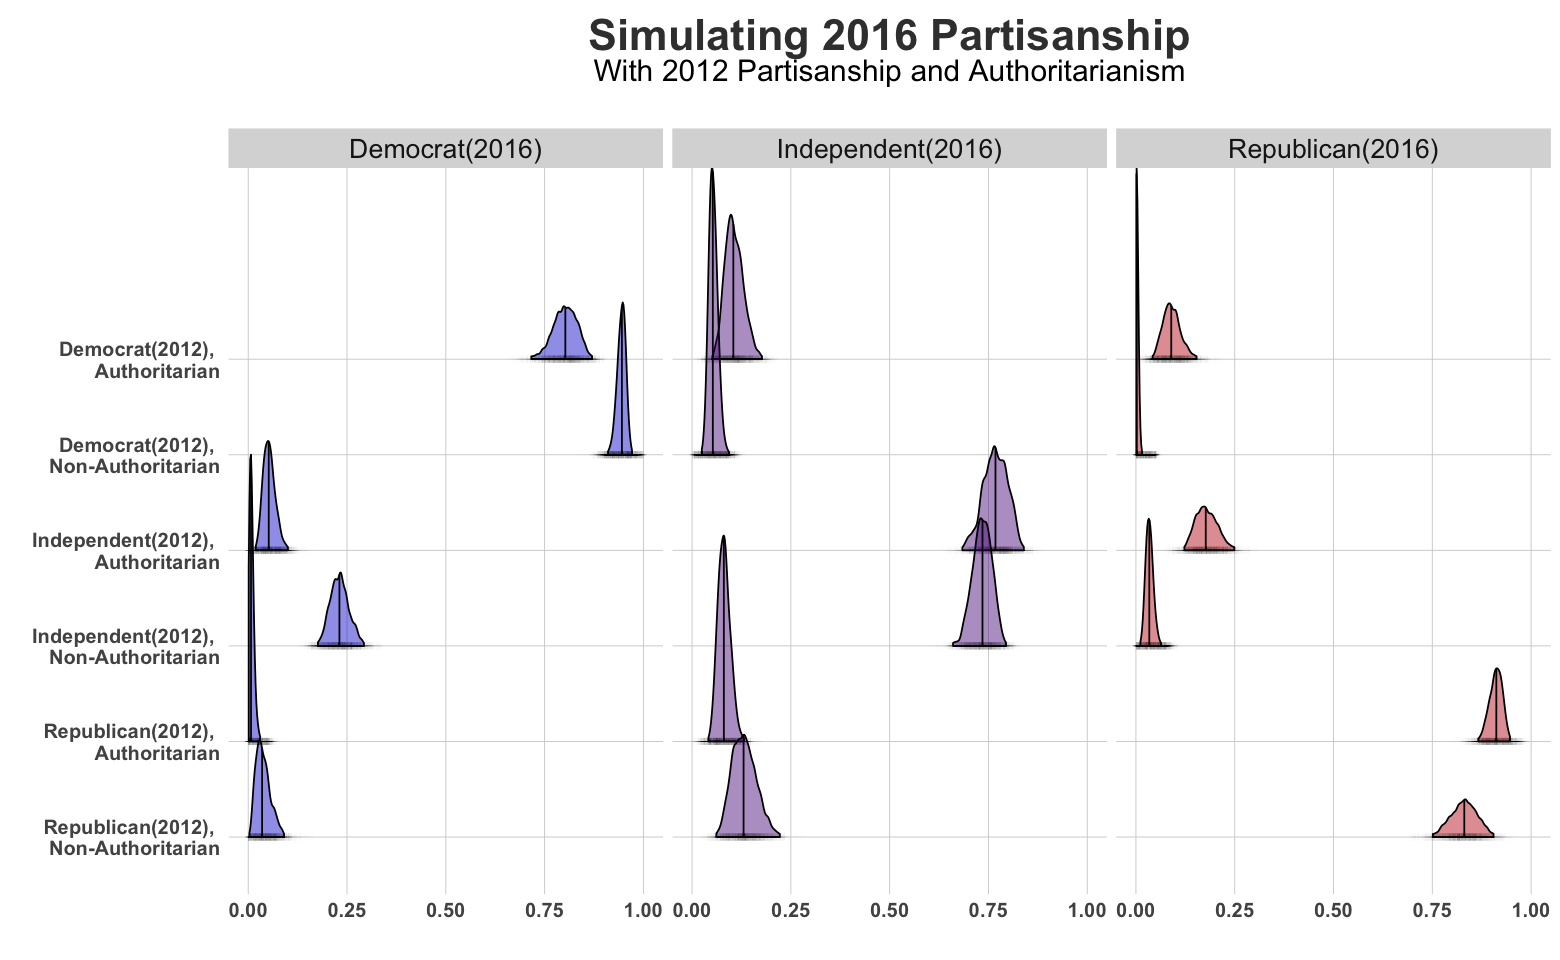

In [91]:
output = dat2012 %>% data_grid(sex.2012 = mean(sex.2012), age.2012 = mean(age.2012), 
                       college.2012= mean(college.2012), income.2012 = mean(income.2012), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[4]]) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Independent", `2` = "Independent", `3` = "Republican")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0 & authoritarianism == 1, paste("Democrat(2012),", "\nAuthoritarian"),
                                                   ifelse(republican == 0 & independent ==1 & authoritarianism == 1, paste("Independent(2012),", "\nAuthoritarian"),
                                                             ifelse(republican == 1 & independent ==0 & authoritarianism == 1, paste("Republican(2012),", "\nAuthoritarian"),
                                                                  ifelse(republican == 0 & independent ==0 & authoritarianism == 0, paste("Democrat(2012),", "\nNon-Authoritarian"),
                                                                      ifelse(republican == 0 & independent ==1 & authoritarianism == 0, paste("Independent(2012),", "\nNon-Authoritarian"),
                                                                            ifelse(republican == 1 & independent ==0 & authoritarianism == 0, paste("Republican(2012),", "\nNon-Authoritarian"),
                                                    "ILL"))))))) %>% filter(Partisanship != "ILL") %>%
                   mutate(Partisanship2 = ifelse(republican == 0 & independent ==0, "Democrat(2016)", 
                                                ifelse(republican ==1 & independent ==0, "Republican(2016)",
                                                    "Independent(2016)"))) %>% 
                  mutate(Partisanship =   factor(Partisanship, levels=c(paste("Democrat(2012),", "\nAuthoritarian"), 
                                                                       paste("Democrat(2012),", "\nNon-Authoritarian"),
                                                                        paste("Independent(2012),", "\nAuthoritarian"),
                                                                        paste("Independent(2012),", "\nNon-Authoritarian"),
                                                                        paste("Republican(2012),", "\nAuthoritarian"),
                                                                        paste("Republican(2012),", "\nNon-Authoritarian")))) %>% 
                    mutate(Partisanship = fct_rev(Partisanship)) %>%  
                    mutate(PID_T2 = recode(.category, `1` = "Democrat(2016)", `2` = "Independent(2016)", `3` = "Republican(2016)") ) 
                    
                                                                    
options(repr.plot.width=13, repr.plot.height=8)
#0.5 - abs(0.5 - stat(ecdf)))
library(ggridges)      
plot = ggplot(data = output, aes(y = as.factor(Partisanship), 
                          x = .epred, 
                          fill = as.factor(PID_T2)))  +
               geom_density_ridges2(alpha = 0.45, scale = 3, show.legend = FALSE , 
                                  quantile_lines = TRUE,  rel_min_height = 0.01,
                                   quantiles = 0.5,  calc_ecdf = FALSE,
                                    jittered_points = TRUE, position = position_points_jitter(width = 0.05, height = 0),
                                     point_shape = 3, point_size = 1, point_color = "black", point_alpha = 0.01  ) +
                                    facet_wrap(~as.factor(PID_T2)) +
            scale_fill_manual(values =c("#0927d1ea", "#530086", "#c01111")) +
            labs (title = "Simulating 2016 Partisanship", 
                          subtitle = "With 2012 Partisanship and Authoritarianism\n") + 
            scale_x_continuous("", limits=c(0,1))+
            scale_y_discrete("") + 
            ggtheme + 
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )
            
             
 plot


Let's estimate the rightward shift:

In [92]:
## Functions
library(tidyr)
new_dat = dat2012 %>% data_grid(sex.2012 = mean(sex.2012), age.2012 = mean(age.2012), 
                       college.2012= mean(college.2012), income.2012 = mean(income.2012), 
                       authoritarianism = c(0,1),
                       vote1 = c(0,1)) 
model  = dat[[3]]


vote_2012 = create_vote_list(new_dat, model)


## Functions
new_dat = zap_labels(dat2012) %>%  data_grid(sex.2012 = mean(sex.2012), age.2012 = mean(age.2012), 
                       college.2012= mean(college.2012), income.2012 = mean(income.2012), 
                       authoritarianism = c(0,1),
                       republican = c(0,1),
                       independent = c(0,1)) 
model  = dat[[4]]
party_2012 = create_party_list(new_dat, model)


Using Party_2012 as id variables

`summarise()` has grouped output by 'Party_2012'. You can override using the
`.groups` argument.


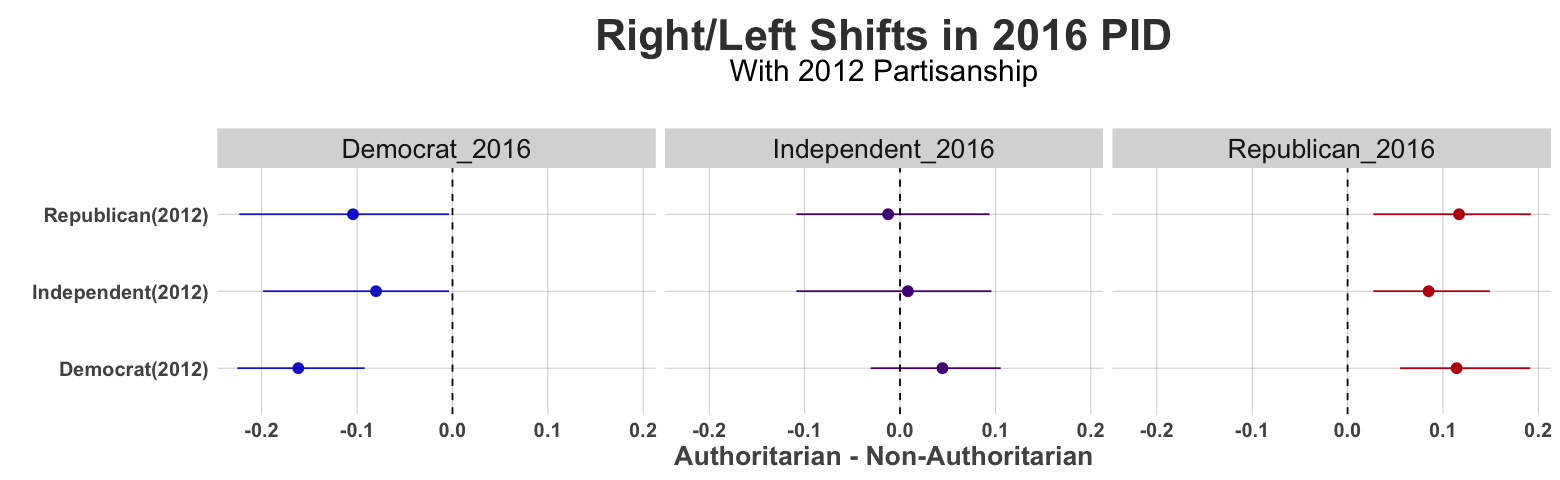

In [93]:
### Customize this for every plot

options(repr.plot.width=13, repr.plot.height=4)



plot_dat = data.frame(rbind(party_2012[[1]], party_2012[[2]], party_2012[[3]]),
           Party_2012 = rep(c("Republican(2012)", "Independent(2012)", "Democrat(2012)"), each = 3000))
names(plot_dat) = c("Democrat_2016", "Independent_2016", "Republican_2016", "Party_2012")

reshape2::melt(plot_dat) %>% group_by(Party_2012, variable) %>% summarize(mean = quantile(value, 0.5), min = quantile(value, 0.025), max = quantile(value, 0.975)) %>% 
ggplot(aes(y = mean, ymax = max, ymin = min, 
                          x = Party_2012, 
                          color = as.factor(variable)))  + facet_wrap(~variable) +
           geom_pointrange() +
            scale_color_manual(values =c("#0927d1ea", "#530086", "#c01111")) +
            labs (title = "Right/Left Shifts in 2016 PID", 
                          subtitle = "With 2012 Partisanship\n") + 
            scale_x_discrete("") + scale_y_continuous("Authoritarian - Non-Authoritarian") + coord_flip() +
            geom_hline(yintercept = 0, linetype = "dashed", colour = "black") + 
            ggtheme + 
                # overrides
                    theme(legend.position="none",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )

Using Vote_2012 as id variables

`summarise()` has grouped output by 'Vote_2012'. You can override using the
`.groups` argument.


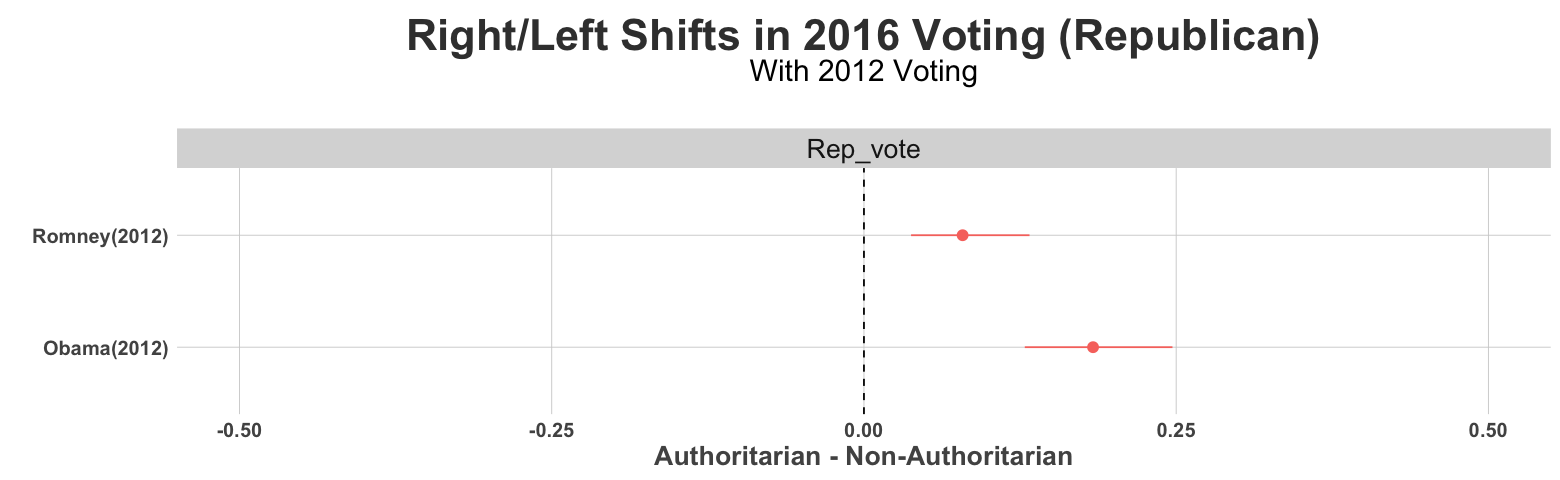

In [94]:
# Shifts in Voting #



plot_dat = data.frame(rbind(vote_2012[[1]], vote_2012[[2]]),
           Vote_2012 = rep(c("Romney(2012)", "Obama(2012)"), each = 1500))
names(plot_dat) = c("Rep_vote", "Vote_2012")

reshape2::melt(plot_dat) %>% group_by(Vote_2012, variable) %>% summarize(mean = quantile(value, 0.5), min = quantile(value, 0.025), max = quantile(value, 0.975)) %>% 
ggplot(aes(y = mean, ymax = max, ymin = min, 
                          x = Vote_2012, 
                          color = "red"))  + facet_wrap(~variable) +
           geom_pointrange() +
            labs (title = "Right/Left Shifts in 2016 Voting (Republican)", 
                          subtitle = "With 2012 Voting\n") + 
            scale_x_discrete("") + scale_y_continuous("Authoritarian - Non-Authoritarian", lim = c(-0.5,0.5)) + coord_flip() +
            geom_hline(yintercept = 0, linetype = "dashed", colour = "black") + 
            ggtheme + 
                # overrides
                    theme(legend.position="none",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )


In [95]:
library(tidyr)
output %>% group_by(Authoritarianism, PID_T2, Partisanship) %>% summarize(Mean = mean(.epred) %>% format(scientific = FALSE)) 

`summarise()` has grouped output by 'Authoritarianism', 'PID_T2'. You can
override using the `.groups` argument.


Authoritarianism,PID_T2,Partisanship,Mean
<chr>,<fct>,<fct>,<chr>
Authoritarian,Democrat(2016),"Republican(2012), Authoritarian",0.008223803
Authoritarian,Democrat(2016),"Independent(2012), Authoritarian",0.05345297
Authoritarian,Democrat(2016),"Democrat(2012), Authoritarian",0.8014242
Authoritarian,Independent(2016),"Republican(2012), Authoritarian",0.08094917
Authoritarian,Independent(2016),"Independent(2012), Authoritarian",0.7678182
Authoritarian,Independent(2016),"Democrat(2012), Authoritarian",0.1070535
Authoritarian,Republican(2016),"Republican(2012), Authoritarian",0.910827
Authoritarian,Republican(2016),"Independent(2012), Authoritarian",0.1787288
Authoritarian,Republican(2016),"Democrat(2012), Authoritarian",0.09152231


# And, 2020

Warning message:
"Duplicated aesthetics after name standardisation: quantiles"
Picking joint bandwidth of 0.00707

Picking joint bandwidth of 0.00921

Picking joint bandwidth of 0.00756



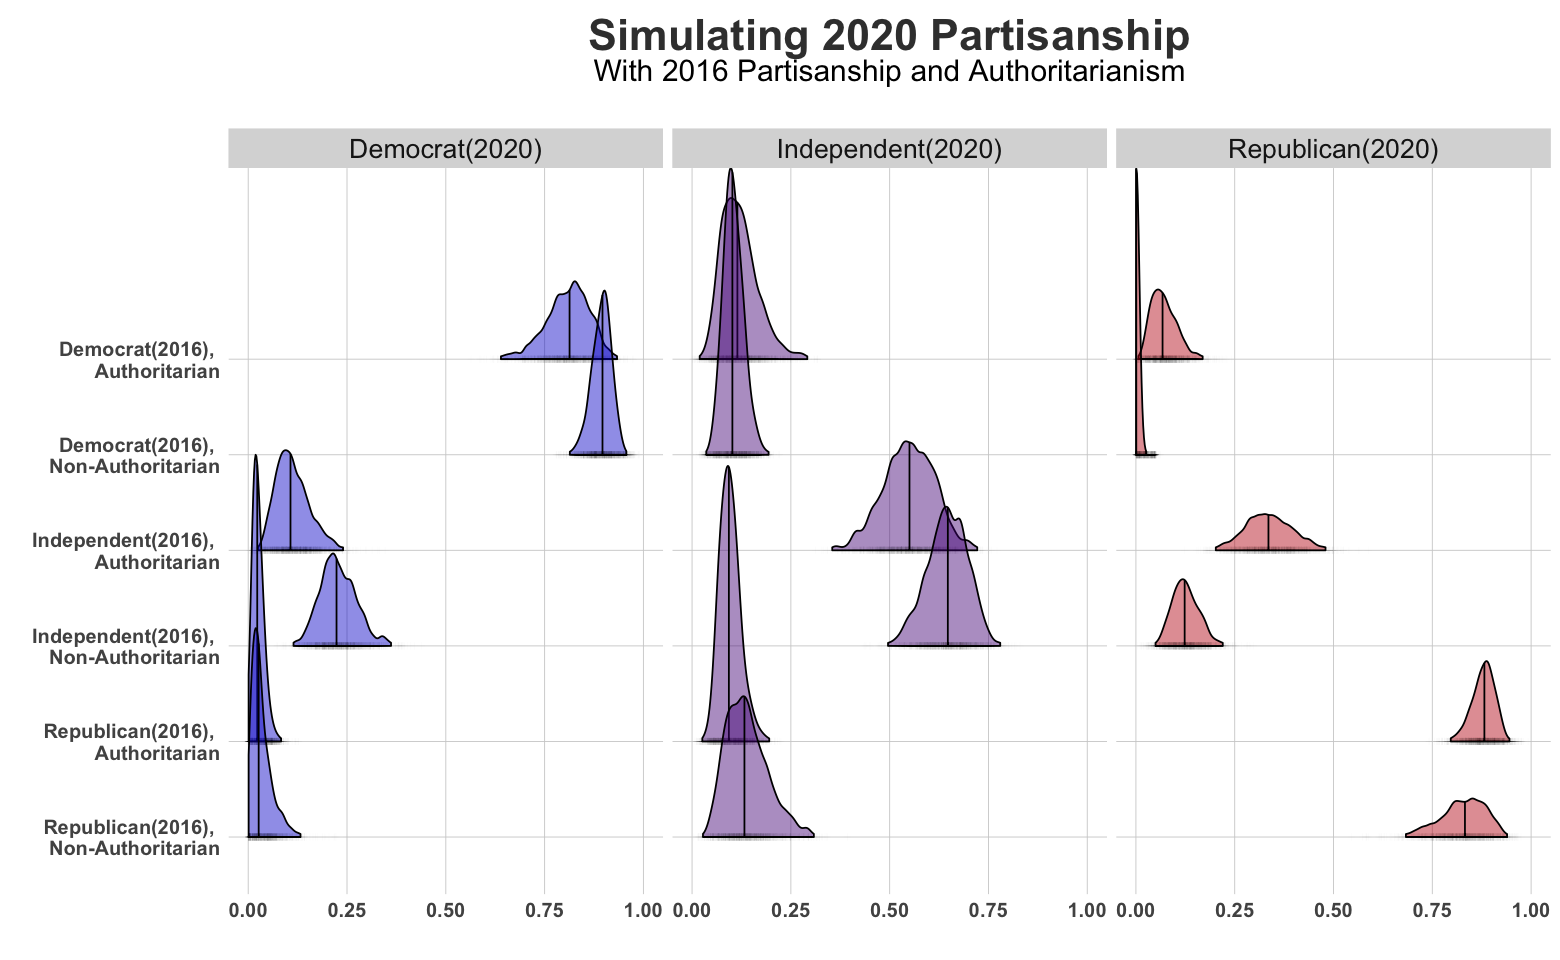

In [96]:
output = dat2016 %>% data_grid(female.2016 = mean(female.2016), age.2016 = mean(age.2016), 
                       college.2016= mean(college.2016), income.2016 = mean(income.2016), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[6]]) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Independent", `2` = "Independent", `3` = "Republican")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0 & authoritarianism == 1, paste("Democrat(2016),", "\nAuthoritarian"),
                                                   ifelse(republican == 0 & independent ==1 & authoritarianism == 1, paste("Independent(2016),", "\nAuthoritarian"),
                                                             ifelse(republican == 1 & independent ==0 & authoritarianism == 1, paste("Republican(2016),", "\nAuthoritarian"),
                                                                  ifelse(republican == 0 & independent ==0 & authoritarianism == 0, paste("Democrat(2016),", "\nNon-Authoritarian"),
                                                                      ifelse(republican == 0 & independent ==1 & authoritarianism == 0, paste("Independent(2016),", "\nNon-Authoritarian"),
                                                                            ifelse(republican == 1 & independent ==0 & authoritarianism == 0, paste("Republican(2016),", "\nNon-Authoritarian"),
                                                    "ILL"))))))) %>% filter(Partisanship != "ILL") %>%
                   mutate(Partisanship2 = ifelse(republican == 0 & independent ==0, "Democrat(2020)", 
                                                ifelse(republican ==1 & independent ==0, "Republican(2020)",
                                                    "Independent(2016)"))) %>% 
                  mutate(Partisanship =   factor(Partisanship, levels=c(paste("Democrat(2016),", "\nAuthoritarian"), 
                                                                       paste("Democrat(2016),", "\nNon-Authoritarian"),
                                                                        paste("Independent(2016),", "\nAuthoritarian"),
                                                                        paste("Independent(2016),", "\nNon-Authoritarian"),
                                                                        paste("Republican(2016),", "\nAuthoritarian"),
                                                                        paste("Republican(2016),", "\nNon-Authoritarian")))) %>% 
                    mutate(Partisanship = fct_rev(Partisanship)) %>%  
                    mutate(PID_T2 = recode(.category, `1` = "Democrat(2020)", `2` = "Independent(2020)", `3` = "Republican(2020)") ) 
                    
                                                                    
options(repr.plot.width=13, repr.plot.height=8)
#0.5 - abs(0.5 - stat(ecdf)))
library(ggridges)      
plot = ggplot(data = output, aes(y = as.factor(Partisanship), 
                          x = .epred, 
                          fill = as.factor(PID_T2)))  +
            geom_density_ridges2(alpha = 0.45, scale = 3, show.legend = FALSE , 
                                  quantile_lines = TRUE, quantiles = 0.5, rel_min_height = 0.01,
                                   quantiles = 0.5,  calc_ecdf = FALSE,
                                    jittered_points = TRUE, position = position_points_jitter(width = 0.05, height = 0),
                                     point_shape = 3, point_size = 1, point_color = "black", point_alpha = 0.01  ) +
                                    facet_wrap(~as.factor(PID_T2)) +
            scale_fill_manual(values =c("#0927d1ea", "#530086", "#c01111")) +
            labs (title = "Simulating 2020 Partisanship", 
                          subtitle = "With 2016 Partisanship and Authoritarianism\n") + 
            scale_x_continuous("", limits=c(0,1))+
            scale_y_discrete("") + 
            ggtheme + 
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )
            
             
 plot


In [97]:
new_dat = dat2016 %>% data_grid(female.2016 = mean(female.2016), age.2016 = mean(age.2016), 
                       college.2016= mean(college.2016), income.2016 = mean(income.2016), 
                       authoritarianism = c(0,1),
                       vote1 = c(0,1)) 
model  = dat[[5]]


vote_2016 = create_vote_list(new_dat, model)


## Functions
new_dat = zap_labels(dat2016) %>%  data_grid(female.2016 = mean(female.2016), age.2016 = mean(age.2016), 
                       college.2016= mean(college.2016), income.2016 = mean(income.2016), 
                       authoritarianism = c(0,1),
                       republican = c(0,1),
                       independent = c(0,1)) 
model  = dat[[6]]
party_2016 = create_party_list(new_dat, model)


Using Party_2016 as id variables

`summarise()` has grouped output by 'Party_2016'. You can override using the
`.groups` argument.


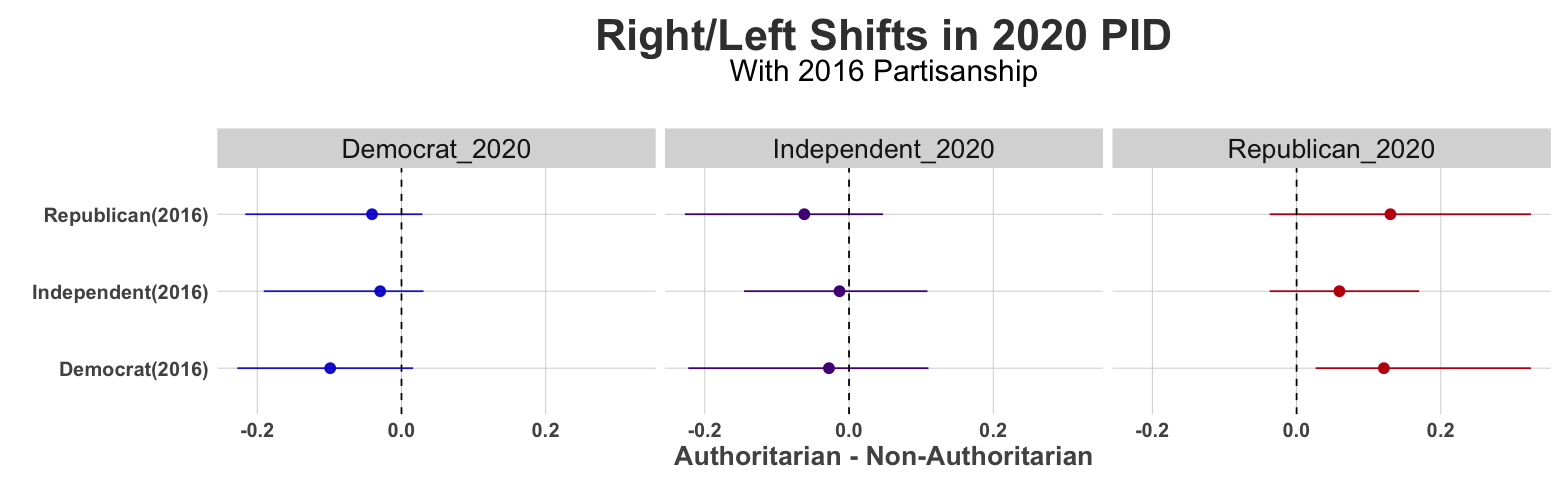

In [98]:
### Customize this for every plot

options(repr.plot.width=13, repr.plot.height=4)



plot_dat = data.frame(rbind(party_2016[[1]], party_2016[[2]], party_2016[[3]]),
           Party_2016 = rep(c("Republican(2016)", "Independent(2016)", "Democrat(2016)"), each = 3000))
names(plot_dat) = c("Democrat_2020", "Independent_2020", "Republican_2020", "Party_2016")

reshape2::melt(plot_dat) %>% group_by(Party_2016, variable) %>% summarize(mean = quantile(value, 0.5), min = quantile(value, 0.025), max = quantile(value, 0.975)) %>% 
ggplot(aes(y = mean, ymax = max, ymin = min, 
                          x = Party_2016, 
                          color = as.factor(variable)))  + facet_wrap(~variable) +
           geom_pointrange() +
            scale_color_manual(values =c("#0927d1ea", "#530086", "#c01111")) +
            labs (title = "Right/Left Shifts in 2020 PID", 
                          subtitle = "With 2016 Partisanship\n") + 
            scale_x_discrete("") + scale_y_continuous("Authoritarian - Non-Authoritarian") + coord_flip() +
            geom_hline(yintercept = 0, linetype = "dashed", colour = "black") + 
            ggtheme + 
                # overrides
                    theme(legend.position="none",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )

Using Vote_2016 as id variables

`summarise()` has grouped output by 'Vote_2016'. You can override using the
`.groups` argument.


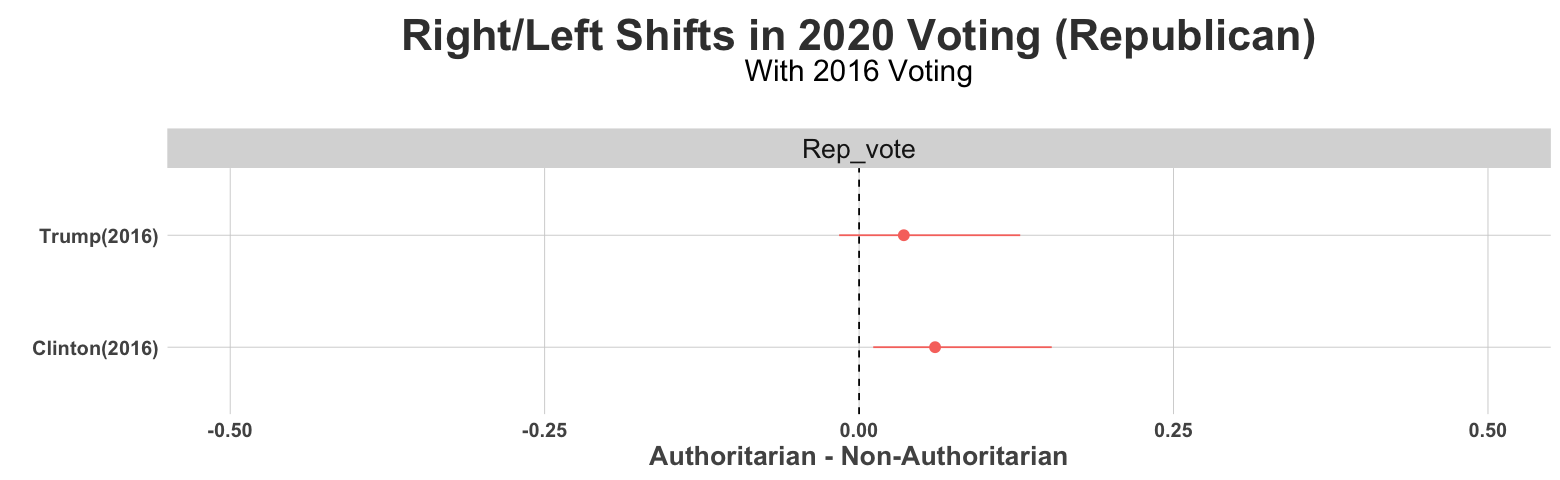

In [99]:

plot_dat = data.frame(rbind(vote_2016[[1]], vote_2016[[2]]),
           Vote_2016 = rep(c("Trump(2016)", "Clinton(2016)"), each = 1500))
names(plot_dat) = c("Rep_vote", "Vote_2016")

reshape2::melt(plot_dat) %>% group_by(Vote_2016, variable) %>% summarize(mean = quantile(value, 0.5), min = quantile(value, 0.025), max = quantile(value, 0.975)) %>% 
ggplot(aes(y = mean, ymax = max, ymin = min, 
                          x = Vote_2016, 
                          color = "red"))  + facet_wrap(~variable) +
           geom_pointrange() +
            labs (title = "Right/Left Shifts in 2020 Voting (Republican)", 
                          subtitle = "With 2016 Voting\n") + 
            scale_x_discrete("") + scale_y_continuous("Authoritarian - Non-Authoritarian", lim = c(-0.5,0.5)) + coord_flip() +
            geom_hline(yintercept = 0, linetype = "dashed", colour = "black") + 
            ggtheme + 
                # overrides
                    theme(legend.position="none",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 18, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )

In [101]:
library(tidyr)
output %>% group_by(Authoritarianism, PID_T2, Partisanship) %>% summarize(Mean = mean(.epred) %>% format(scientific = FALSE)) 

`summarise()` has grouped output by 'Authoritarianism', 'PID_T2'. You can
override using the `.groups` argument.


Authoritarianism,PID_T2,Partisanship,Mean
<chr>,<fct>,<fct>,<chr>
Authoritarian,Democrat(2020),"Republican(2016), Authoritarian",0.02530033
Authoritarian,Democrat(2020),"Independent(2016), Authoritarian",0.1131517
Authoritarian,Democrat(2020),"Democrat(2016), Authoritarian",0.8074649
Authoritarian,Independent(2020),"Republican(2016), Authoritarian",0.095758
Authoritarian,Independent(2020),"Independent(2016), Authoritarian",0.5485933
Authoritarian,Independent(2020),"Democrat(2016), Authoritarian",0.1202495
Authoritarian,Republican(2020),"Republican(2016), Authoritarian",0.8789417
Authoritarian,Republican(2020),"Independent(2016), Authoritarian",0.338255
Authoritarian,Republican(2020),"Democrat(2016), Authoritarian",0.07228563


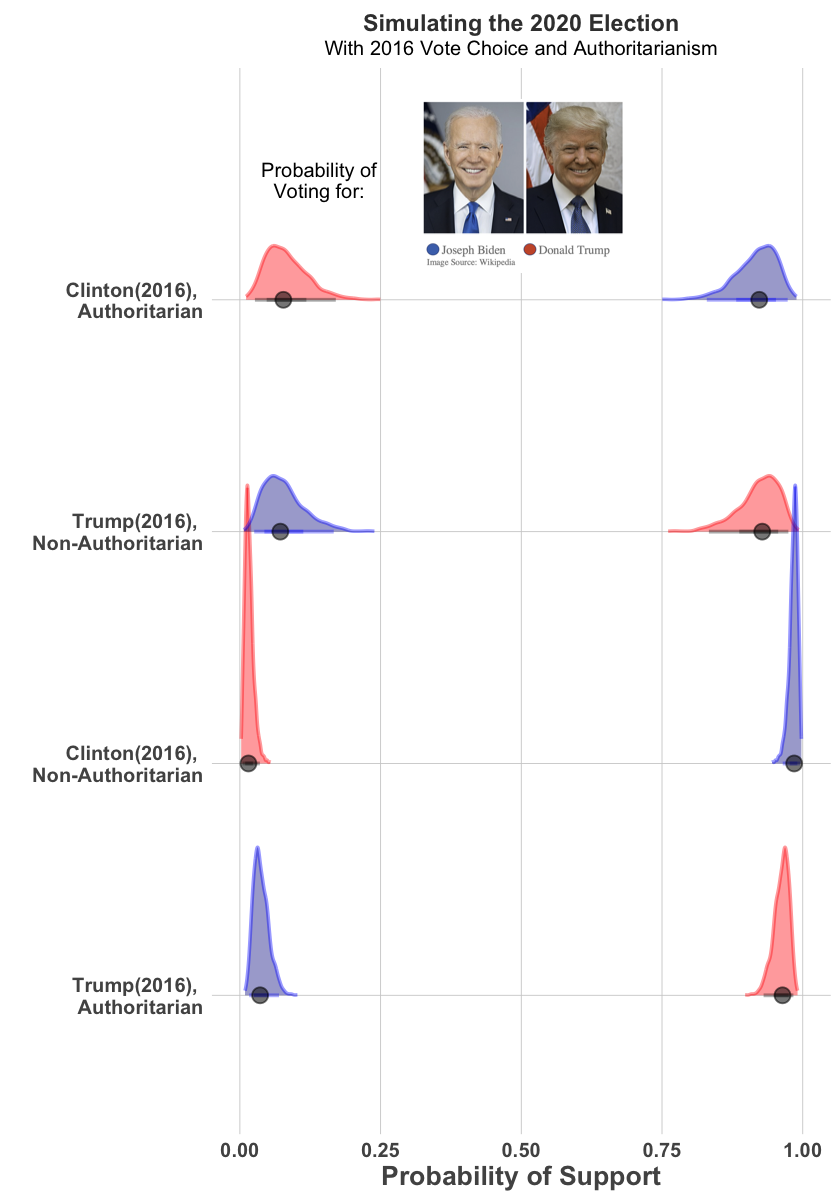

In [102]:
options(repr.plot.width=7, repr.plot.height=10)


ggtheme = theme(
        plot.title=element_text(face="bold",hjust=0,vjust=0,colour="#3C3C3C",size=20),
        axis.text.x=element_text(size=16,colour="#535353",face="bold"),
        axis.text.y=element_text(size=16,colour="#535353",face="bold"),
        axis.title = element_text(size=16,colour="#535353",face="bold"),
        axis.title.y=element_text(size=16,colour="#535353",face="bold",vjust=1.5),
        axis.ticks=element_blank(),
        strip.text.x = element_text(size = 16),
        panel.grid.major=element_line(colour="#D0D0D0",size=.25),
        panel.background=element_rect(fill="white"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16)) 
####

 plot = dat2016 %>% data_grid(female.2016 = mean(female.2016), age.2016 = mean(age.2016), 
                       college.2016= mean(college.2016), income.2016 = mean(income.2016), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[5]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Trump(2016),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Clinton(2016),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Trump(2016),", "\nNon-Authoritarian"), 
                                                        paste("Clinton(2016),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Clinton(2016),", "\nAuthoritarian"),
                                        paste("Trump(2016),", "\nNon-Authoritarian"), 
                                        paste("Clinton(2016),", "\nNon-Authoritarian"), 
                                        paste("Trump(2016),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter)) %>% 
                    ggplot() +
                         stat_slabinterval(aes(y = Vote_Republican, x = Voter), 
                                            slab_color = "red", scale = 1.2, interval_size = 4, 
                                            point_size =4 , interval_color = "black",
                                             side = "top", alpha = 0.32,  
                                          point_color = "black",  
                                            slab_fill = "red", slab_alpha =.4) +
                    stat_slabinterval( aes(y = Vote_Democrat, x = Voter), 
                                            point_color = "black", point_size = 4,
                                            slab_color = "blue", scale =1.2, alpha = 0.32,
                                            interval_size = 4, interval_color = "blue",
                                           side = "top", slab_alpha = 0.4, 
                                            slab_fill = "darkblue") +
                    #geom_hline(yintercept = refs$Mean, type = "dashed") + 
                    labs (title = "Simulating the 2020 Election", subtitle = "With 2016 Vote Choice and Authoritarianism") + 
                    scale_y_continuous("Probability of Support", limits=c(0,1))+
                    scale_x_discrete("") + 
                    coord_flip() +
                    ggtheme + scale_fill_manual(aes(fill = Voter_Type, group = Voter_Type),
                    name="Predicted 2004\nPresidential Vote", values=c("blue", "red"),  position = "top") +
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 14, hjust = 0.5),
                    plot.subtitle = element_text(size = 12, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )



# # Example with PNG (for fun, the OP's avatar - I love the raccoon)
 ggdraw() +
   draw_plot(plot)+
   draw_image("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/figs/pres/trumpbiden.png",
               x = 0.5, y = 0.72, width =0.25, height =0.25) +
   draw_label("Probability of\nVoting for:", color = "black", x = 0.38, y=0.85, size = 12)                                        
              

In [103]:
dat2016 %>% data_grid(female.2016 = mean(female.2016), age.2016 = mean(age.2016), 
                       college.2016= mean(college.2016), income.2016 = mean(income.2016), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[5]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Trump(2016),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Clinton(2016),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Trump(2016),", "\nNon-Authoritarian"), 
                                                        paste("Clinton(2016),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Clinton(2016),", "\nAuthoritarian"),
                                        paste("Trump(2016),", "\nNon-Authoritarian"), 
                                        paste("Clinton(2016),", "\nNon-Authoritarian"), 
                                        paste("Trump(2016),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter)) %>% 
                        group_by(Voter, Authoritarianism ) %>% summarize(VOTER = mean(Vote_Republican),
                                                                         VOTERD = mean(Vote_Republican))

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


Voter,Authoritarianism,VOTER,VOTERD
<fct>,<chr>,<dbl>,<dbl>
"Trump(2016), Authoritarian",Authoritarianism,0.96206182,0.96206182
"Clinton(2016), Non-Authoritarian",Non-Authoritarians,0.01643823,0.01643823
"Trump(2016), Non-Authoritarian",Non-Authoritarians,0.92177500,0.92177500
"Clinton(2016), Authoritarian",Authoritarianism,0.08292470,0.08292470


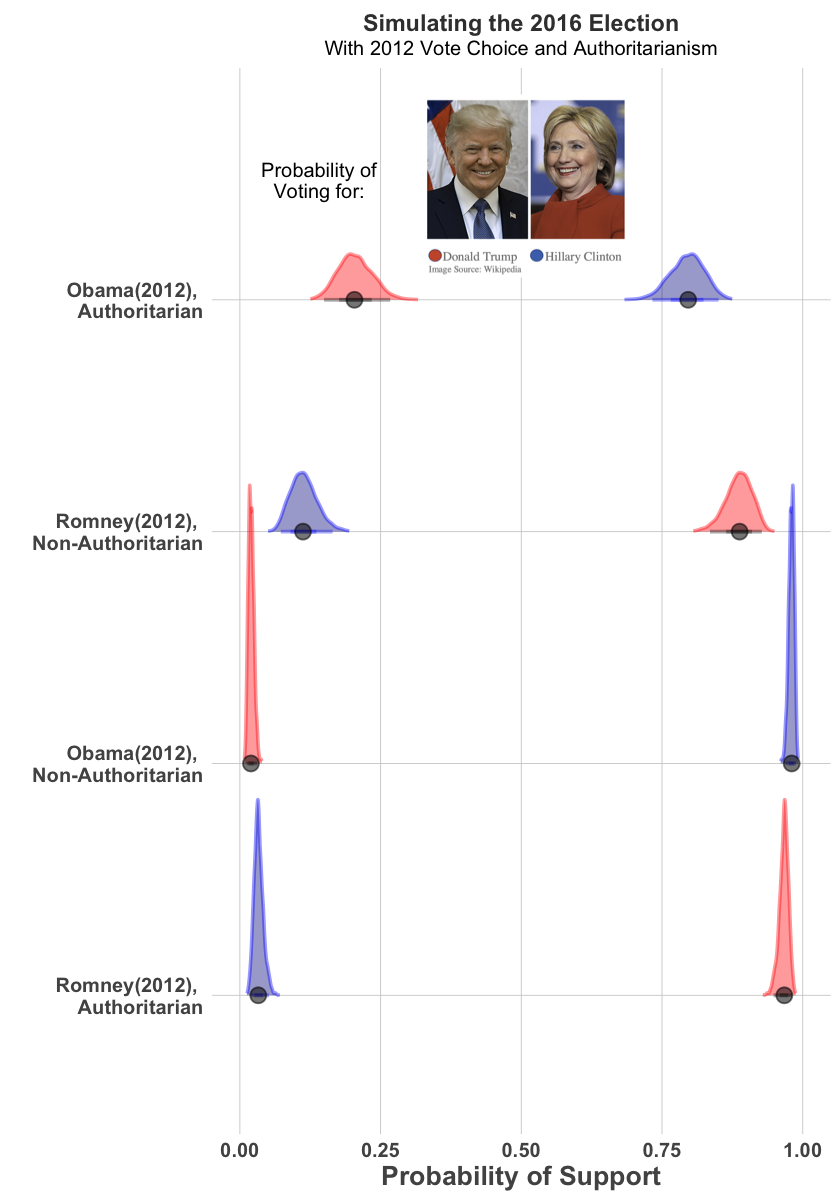

In [40]:
options(repr.plot.width=7, repr.plot.height=10)


ggtheme = theme(
        plot.title=element_text(face="bold",hjust=0,vjust=0,colour="#3C3C3C",size=20),
        axis.text.x=element_text(size=16,colour="#535353",face="bold"),
        axis.text.y=element_text(size=16,colour="#535353",face="bold"),
        axis.title = element_text(size=16,colour="#535353",face="bold"),
        axis.title.y=element_text(size=16,colour="#535353",face="bold",vjust=1.5),
        axis.ticks=element_blank(),
        strip.text.x = element_text(size = 16),
        panel.grid.major=element_line(colour="#D0D0D0",size=.25),
        panel.background=element_rect(fill="white"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16)) 
####

 plot = dat2012 %>% data_grid(sex.2012 = mean(sex.2012), age.2012 = mean(age.2012), 
                       college.2012= mean(college.2012), income.2012 = mean(income.2012), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[3]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Romney(2012),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Obama(2012),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Romney(2012),", "\nNon-Authoritarian"), 
                                                        paste("Obama(2012),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Obama(2012),", "\nAuthoritarian"),
                                        paste("Romney(2012),", "\nNon-Authoritarian"), 
                                        paste("Obama(2012),", "\nNon-Authoritarian"), 
                                        paste("Romney(2012),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter)) %>% 
                         ggplot() +
                         stat_slabinterval(aes(y = Vote_Republican, x = Voter), 
                                            slab_color = "red", scale = 1.2, interval_size = 4, 
                                            point_size =4 , interval_color = "black",
                                             side = "top", alpha = 0.32,  
                                          point_color = "black",  
                                            slab_fill = "red", slab_alpha =.4) +
                    stat_slabinterval( aes(y = Vote_Democrat, x = Voter), 
                                            point_color = "black", point_size = 4,
                                            slab_color = "blue", scale =1.2, alpha = 0.32,
                                            interval_size = 4, interval_color = "blue",
                                           side = "top", slab_alpha = 0.4, 
                                            slab_fill = "darkblue") +
                    #geom_hline(yintercept = refs$Mean, type = "dashed") + 
                    labs (title = "Simulating the 2016 Election", subtitle = "With 2012 Vote Choice and Authoritarianism") + 
                    scale_y_continuous("Probability of Support", limits=c(0,1))+
                    scale_x_discrete("") + 
                    coord_flip() +
                    ggtheme + scale_fill_manual(aes(fill = Voter_Type, group = Voter_Type),
                    name="Predicted 2004\nPresidential Vote", values=c("blue", "red"),  position = "top") +
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 14, hjust = 0.5),
                    plot.subtitle = element_text(size = 12, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )



# # Example with PNG (for fun, the OP's avatar - I love the raccoon)
 ggdraw() +
   draw_plot(plot)+
   draw_image("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/figs/pres/trumpclinton.png",
               x = 0.5, y = 0.72, width =0.25, height =0.25) +
   draw_label("Probability of\nVoting for:", color = "black", x = 0.38, y=0.85, size = 12)   

In [80]:
dat2012 %>% data_grid(sex.2012 = mean(sex.2012), age.2012 = mean(age.2012), 
                       college.2012= mean(college.2012), income.2012 = mean(income.2012), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[3]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Romney(2012),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Obama(2012),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Romney(2012),", "\nNon-Authoritarian"), 
                                                        paste("Obama(2012),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Obama(2012),", "\nAuthoritarian"),
                                        paste("Romney(2012),", "\nNon-Authoritarian"), 
                                        paste("Obama(2012),", "\nNon-Authoritarian"), 
                                        paste("Romney(2012),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter)) %>% 
                                                group_by(Voter, Authoritarianism ) %>% summarize(VOTER = mean(Vote_Republican),
                                                                         VOTERD = 1-mean(Vote_Republican))

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


Voter,Authoritarianism,VOTER,VOTERD
<fct>,<chr>,<dbl>,<dbl>
"Romney(2012), Authoritarian",Authoritarianism,0.96653562,0.03346438
"Obama(2012), Non-Authoritarian",Non-Authoritarians,0.02009475,0.97990525
"Romney(2012), Non-Authoritarian",Non-Authoritarians,0.88644682,0.11355318
"Obama(2012), Authoritarian",Authoritarianism,0.20516684,0.79483316
